In [21]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

**ORIGINAL VARIABLES COMPARED WITH PARENT OFFICE NAME & DISTRIBUTION CHANNEL NAME**

VARIABLES: AGE, PRODUCT FAMILY, LTC, NLG, DISTRIBUTIONS, LISTBILL

In [22]:
#takes in data and makes an office parent office key as well as select the X values to perform clustering on
data = pd.read_csv("Preprocessed_files.csv").reset_index(drop = True)
additional = pd.read_csv("Additional_Data.csv")
OFFICES = pd.DataFrame(pd.DataFrame(data['OFFICE']).merge(additional,how='left',on='OFFICE')[['OFFICE','PARENT_OFFICE_NAME','DISTRIBUTION_CHANNEL_NAME']]).drop_duplicates()
X = data[['35-65','65+','Indexed Universal','Term','Universal','Variable Universal','LTC:True','NLG:True','DISTRIBUTIONS:True','LISTBILL:True']]
#'COLI UNIT','EDWARD JONES','M FINANCIAL','MISC','MKTNG ORGANIZATIONS','NASD','REG LIFE OFFICES','WFG','WIREHOUSE',]]

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
scale = StandardScaler()
data_pipeline = Pipeline([
('imputer',SimpleImputer(strategy = "constant", fill_value=0)),
#('std_scaler',StandardScaler())
])
X_transformed = data_pipeline.fit_transform(X)

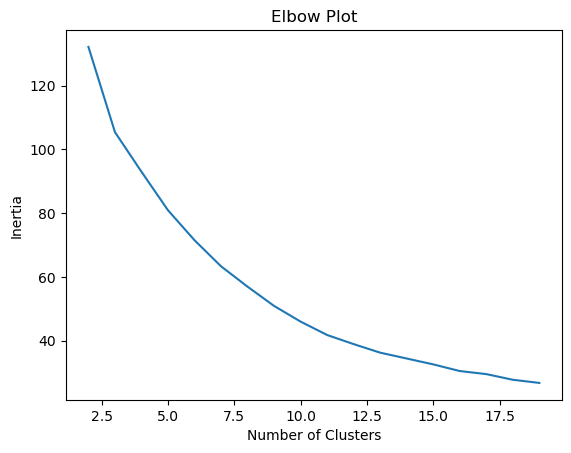

In [24]:
OMP_NUM_THREADS=1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
inertia = []
silhouette = []
for i in list(range(2,20)):
    kmeans = KMeans(n_clusters = i,n_init=40)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_transformed, kmeans.labels_))
plt.title("Elbow Plot",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.plot(list(range(2,20)),inertia)
plt.show()

In [25]:
from kneed import KneeLocator
kl = KneeLocator(range(2,20),inertia,curve="convex",direction="decreasing")
kl.elbow

8

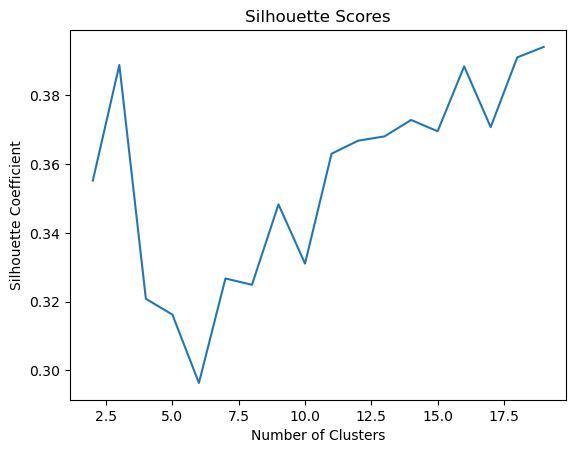

In [26]:
plt.title("Silhouette Scores",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(list(range(2,20)),silhouette)
plt.show()

In [27]:
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(X_transformed)
centers = pd.DataFrame(np.around(kmeans_3.cluster_centers_,3),columns = X.columns)
centers


,35-65,65+,Indexed Universal,Term,Universal,Variable Universal,LTC:True,NLG:True,DISTRIBUTIONS:True,LISTBILL:True
0,0.759,0.139,0.060,0.000,0.001,0.938,0.297,0.029,0.293,0.015
1,0.913,0.016,0.451,-0.000,0.395,0.154,0.029,0.058,0.060,0.899
2,0.660,0.138,0.881,0.001,0.008,0.111,0.139,0.381,0.440,0.016


In [28]:
Clustered = data.assign(cluster = kmeans_3.labels_)
Clustered=Clustered[['OFFICE','cluster']].merge(OFFICES,how="left",on="OFFICE")
Clustered_Parents=pd.crosstab(Clustered["PARENT_OFFICE_NAME"],Clustered["cluster"])
Clustered_Parents.to_csv("Clustered_Parents.csv")
df=Clustered_Parents.loc[Clustered_Parents.sum(axis=1)>1]

df

cluster,0,1,2
PARENT_OFFICE_NAME,,,
ARIZONA REGIONAL LIFE OFFICE,0,1,1
COLI UNIT,0,4,0
Crump Life Insurance Services Inc,1,0,2
Diversified Brokerage Services Inc,2,0,0
EDWARD JONES & COMPANY,4,0,0
GREATER PACIFIC RLO,1,0,1
GREATER TEXAS REG LIFE OFFICE,0,0,2
MORGAN STANLEY (MSSB),2,0,0
Pinnacle Ins & Financial Services LLC,0,1,2


In [29]:
Clustered_Dist=pd.crosstab(Clustered["DISTRIBUTION_CHANNEL_NAME"],Clustered["cluster"])
df1=Clustered_Dist.loc[Clustered_Dist.sum(axis=1)>0]

df1

cluster,0,1,2
DISTRIBUTION_CHANNEL_NAME,,,
ALTERNATIVE DISTRIB,0,0,1
COLI UNIT,0,5,0
EDWARD JONES,4,0,0
M FINANCIAL,35,17,15
MISC,1,0,1
MKTNG ORGANIZATIONS,3,2,16
NASD,1,0,0
REG LIFE OFFICES,3,2,24
WFG,1,0,6


**NEW VARIABLES COMPARED WITH PARENT OFFICE NAME & DISTRIBUTION CHANNEL NAME**

VARIABLES: (FACE AMOUNT > 900,000), PRODUCT FAMILY, NLG, LTC

In [30]:
#takes in data and makes an office parent office key as well as select the X values to perform clustering on
data = pd.read_csv("Preprocessed_files.csv").reset_index(drop = True)
additional = pd.read_csv("Additional_Data.csv")
OFFICES = pd.DataFrame(pd.DataFrame(data['OFFICE']).merge(additional,how='left',on='OFFICE')[['OFFICE','PARENT_OFFICE_NAME','DISTRIBUTION_CHANNEL_NAME']]).drop_duplicates()
X = data[['FACE_AMOUNT_900000_PLUS:True', 'Indexed Universal','Term','Universal','Variable Universal','NLG:True','LTC:True']]
#'COLI UNIT','EDWARD JONES','M FINANCIAL','MISC','MKTNG ORGANIZATIONS','NASD','REG LIFE OFFICES','WFG','WIREHOUSE',]]




In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
scale = StandardScaler()
data_pipeline = Pipeline([
('imputer',SimpleImputer(strategy = "constant", fill_value=0)),
#('std_scaler',StandardScaler())
])
X_transformed = data_pipeline.fit_transform(X)


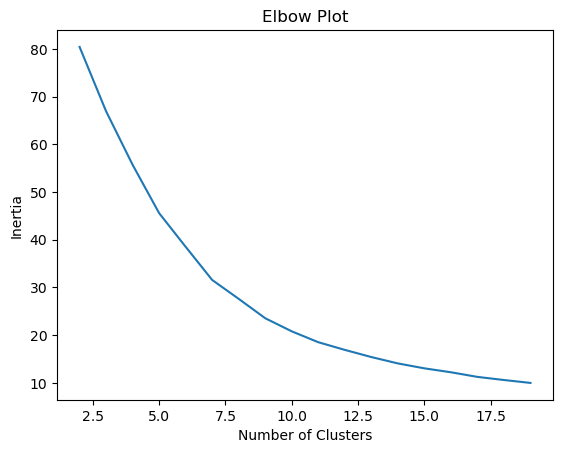

In [32]:
OMP_NUM_THREADS=1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
inertia = []
silhouette = []
for i in list(range(2,20)):
    kmeans = KMeans(n_clusters = i,n_init=40)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_transformed, kmeans.labels_))
plt.title("Elbow Plot",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.plot(list(range(2,20)),inertia)
plt.show()

In [33]:
from kneed import KneeLocator
kl = KneeLocator(range(2,20),inertia,curve="convex",direction="decreasing")
kl.elbow

7

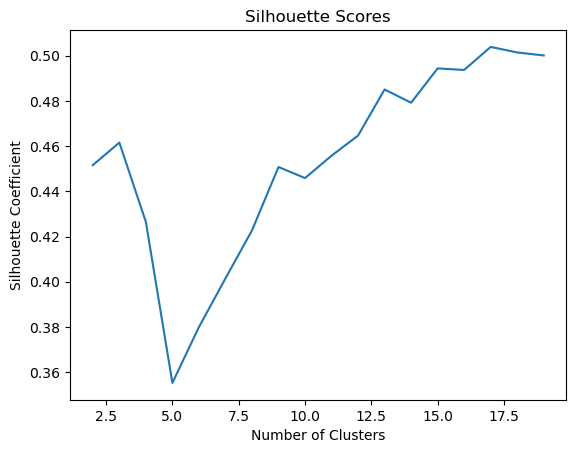

In [34]:
plt.title("Silhouette Scores",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(list(range(2,20)),silhouette)
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(X_transformed)
centers = pd.DataFrame(np.around(kmeans_3.cluster_centers_,3),columns = X.columns)
centers


,FACE_AMOUNT_900000_PLUS:True,Indexed Universal,Term,Universal,Variable Universal,NLG:True,LTC:True
0,0.274,0.063,0.000,0.003,0.933,0.028,0.289
1,0.405,0.888,0.001,0.012,0.100,0.349,0.128
2,0.384,0.074,0.000,0.796,0.130,0.034,0.023


In [36]:
Clustered = data.assign(cluster = kmeans_3.labels_)
Clustered=Clustered[['OFFICE','cluster']].merge(OFFICES,how="left",on="OFFICE")
Clustered_Parents=pd.crosstab(Clustered["PARENT_OFFICE_NAME"],Clustered["cluster"])
df=Clustered_Parents.loc[Clustered_Parents.sum(axis=1)>1]
df

cluster,0,1,2
PARENT_OFFICE_NAME,,,
ARIZONA REGIONAL LIFE OFFICE,0,2,0
COLI UNIT,1,1,2
Crump Life Insurance Services Inc,1,2,0
Diversified Brokerage Services Inc,2,0,0
EDWARD JONES & COMPANY,4,0,0
GREATER PACIFIC RLO,1,1,0
GREATER TEXAS REG LIFE OFFICE,0,2,0
MORGAN STANLEY (MSSB),2,0,0
Pinnacle Ins & Financial Services LLC,0,2,1


In [37]:
Clustered_Dist=pd.crosstab(Clustered["DISTRIBUTION_CHANNEL_NAME"],Clustered["cluster"])
df1=Clustered_Dist.loc[Clustered_Dist.sum(axis=1)>0]

df1

cluster,0,1,2
DISTRIBUTION_CHANNEL_NAME,,,
ALTERNATIVE DISTRIB,0,1,0
COLI UNIT,1,1,3
EDWARD JONES,4,0,0
M FINANCIAL,37,24,6
MISC,1,1,0
MKTNG ORGANIZATIONS,3,16,2
NASD,1,0,0
REG LIFE OFFICES,3,25,1
WFG,1,6,0


In [38]:
kmeans_7 = KMeans(n_clusters = 7)
kmeans_7.fit(X_transformed)
centers = pd.DataFrame(np.around(kmeans_7.cluster_centers_,7),columns = X.columns)
centers


,FACE_AMOUNT_900000_PLUS:True,Indexed Universal,Term,Universal,Variable Universal,NLG:True,LTC:True
0,0.958333,0.017857,0.000000,-0.000000,0.982143,0.000000,0.035714
1,0.383793,0.073990,0.000000,0.796372,0.129638,0.033838,0.023485
2,0.965278,0.946875,0.000000,0.020313,0.032813,0.058333,0.048611
3,0.387791,0.984754,-0.000000,0.003497,0.011749,0.884555,0.192121
4,0.185241,0.076193,-0.000000,0.005965,0.917842,0.042084,0.119029
5,0.250898,0.813428,0.000877,0.012432,0.173263,0.174181,0.123602
6,0.154458,0.029372,-0.000000,0.000203,0.970391,0.014916,0.747357


In [39]:
Clustered = data.assign(cluster = kmeans_7.labels_)
Clustered=Clustered[['OFFICE','cluster']].merge(OFFICES,how="left",on="OFFICE")
Clustered_Parents=pd.crosstab(Clustered["PARENT_OFFICE_NAME"],Clustered["cluster"])
Clustered_Parents.to_csv("Clustered_Parents.csv")
df=Clustered_Parents.loc[Clustered_Parents.sum(axis=1)>1]
df

cluster,0,1,2,3,4,5,6
PARENT_OFFICE_NAME,,,,,,,
ARIZONA REGIONAL LIFE OFFICE,0,0,0,0,0,2,0
COLI UNIT,0,2,0,0,1,1,0
Crump Life Insurance Services Inc,0,0,0,1,0,1,1
Diversified Brokerage Services Inc,0,0,0,0,0,0,2
EDWARD JONES & COMPANY,0,0,0,0,1,0,3
GREATER PACIFIC RLO,0,0,0,0,1,1,0
GREATER TEXAS REG LIFE OFFICE,0,0,0,1,0,1,0
MORGAN STANLEY (MSSB),0,0,0,0,0,0,2
Pinnacle Ins & Financial Services LLC,0,1,0,0,0,2,0


In [40]:
Clustered_Dist=pd.crosstab(Clustered["DISTRIBUTION_CHANNEL_NAME"],Clustered["cluster"])
df1=Clustered_Dist.loc[Clustered_Dist.sum(axis=1)>0]

df1

cluster,0,1,2,3,4,5,6
DISTRIBUTION_CHANNEL_NAME,,,,,,,
ALTERNATIVE DISTRIB,0,0,0,0,0,1,0
COLI UNIT,0,3,0,0,1,1,0
EDWARD JONES,0,0,0,0,1,0,3
M FINANCIAL,9,6,7,6,18,12,9
MISC,0,0,1,0,1,0,0
MKTNG ORGANIZATIONS,1,2,2,3,1,11,1
NASD,0,0,0,0,1,0,0
REG LIFE OFFICES,0,1,0,5,3,20,0
WFG,0,0,0,2,1,4,0


**MORE NEW VARIABLES**

In [41]:
#takes in data and makes an office parent office key as well as select the X values to perform clustering on
data = pd.read_csv("Preprocessed_files.csv").reset_index(drop = True)
additional = pd.read_csv("Additional_Data.csv")
OFFICES = pd.DataFrame(pd.DataFrame(data['OFFICE']).merge(additional,how='left',on='OFFICE')[['OFFICE','PARENT_OFFICE_NAME','DISTRIBUTION_CHANNEL_NAME']]).drop_duplicates()
X = data[['35-65','65+','FACE_AMOUNT_900000_PLUS:True', 'Indexed Universal','Term','Universal','Variable Universal']]
#'COLI UNIT','EDWARD JONES','M FINANCIAL','MISC','MKTNG ORGANIZATIONS','NASD','REG LIFE OFFICES','WFG','WIREHOUSE',]]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
scale = StandardScaler()
data_pipeline = Pipeline([
('imputer',SimpleImputer(strategy = "constant", fill_value=0)),
#('std_scaler',StandardScaler())
])
X_transformed = data_pipeline.fit_transform(X)

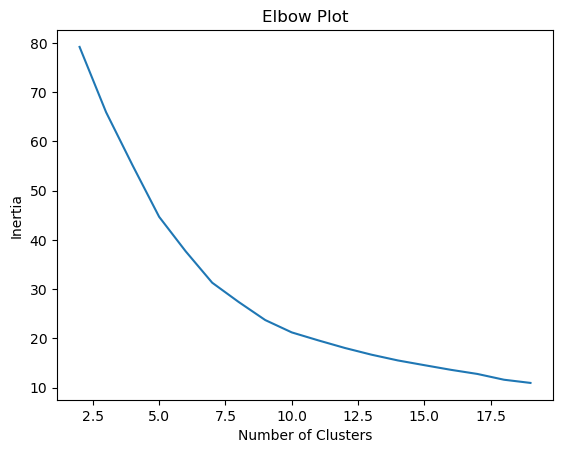

In [43]:
OMP_NUM_THREADS=1
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
inertia = []
silhouette = []
for i in list(range(2,20)):
    kmeans = KMeans(n_clusters = i,n_init=40)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_transformed, kmeans.labels_))
plt.title("Elbow Plot",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.plot(list(range(2,20)),inertia)
plt.show()

In [44]:
from kneed import KneeLocator
kl = KneeLocator(range(2,20),inertia,curve="convex",direction="decreasing")
kl.elbow

7

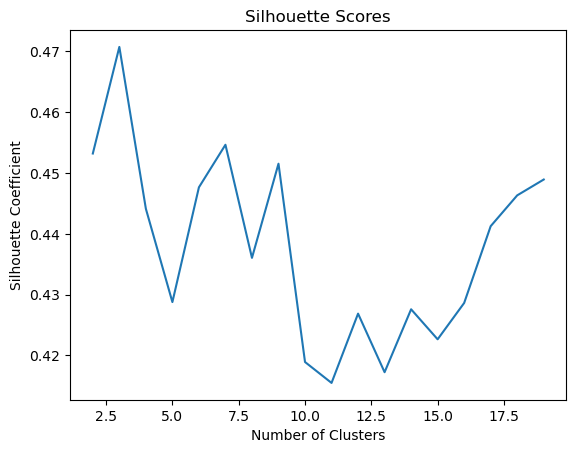

In [45]:
plt.title("Silhouette Scores",loc = 'center')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.plot(list(range(2,20)),silhouette)
plt.show()

In [46]:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(X_transformed)
centers = pd.DataFrame(np.around(kmeans_3.cluster_centers_,3),columns = X.columns)
centers

,35-65,65+,FACE_AMOUNT_900000_PLUS:True,Indexed Universal,Term,Universal,Variable Universal
0,0.689,0.121,0.402,0.880,0.001,0.011,0.108
1,0.761,0.138,0.275,0.055,0.000,0.004,0.941
2,0.945,0.019,0.384,0.074,0.000,0.796,0.130


In [47]:
Clustered = data.assign(cluster = kmeans_3.labels_)
Clustered=Clustered[['OFFICE','cluster']].merge(OFFICES,how="left",on="OFFICE")
Clustered_Parents=pd.crosstab(Clustered["PARENT_OFFICE_NAME"],Clustered["cluster"])
df=Clustered_Parents.loc[Clustered_Parents.sum(axis=1)>1]
df

cluster,0,1,2
PARENT_OFFICE_NAME,,,
ARIZONA REGIONAL LIFE OFFICE,2,0,0
COLI UNIT,1,1,2
Crump Life Insurance Services Inc,2,1,0
Diversified Brokerage Services Inc,0,2,0
EDWARD JONES & COMPANY,0,4,0
GREATER PACIFIC RLO,1,1,0
GREATER TEXAS REG LIFE OFFICE,2,0,0
MORGAN STANLEY (MSSB),0,2,0
Pinnacle Ins & Financial Services LLC,2,0,1


In [48]:
Clustered_Dist=pd.crosstab(Clustered["DISTRIBUTION_CHANNEL_NAME"],Clustered["cluster"])
df1=Clustered_Dist.loc[Clustered_Dist.sum(axis=1)>0]

df1

cluster,0,1,2
DISTRIBUTION_CHANNEL_NAME,,,
ALTERNATIVE DISTRIB,1,0,0
COLI UNIT,1,1,3
EDWARD JONES,0,4,0
M FINANCIAL,25,36,6
MISC,1,1,0
MKTNG ORGANIZATIONS,16,3,2
NASD,0,1,0
REG LIFE OFFICES,25,3,1
WFG,6,1,0


In [49]:
from sklearn.cluster import KMeans
kmeans_7 = KMeans(n_clusters = 7)
kmeans_7.fit(X_transformed)
centers = pd.DataFrame(np.around(kmeans_7.cluster_centers_,7),columns = X.columns)
centers

,35-65,65+,FACE_AMOUNT_900000_PLUS:True,Indexed Universal,Term,Universal,Variable Universal
0,0.875000,0.017857,0.976190,0.035714,0.000000,-0.000000,0.964286
1,0.944934,0.018858,0.383793,0.073990,0.000000,0.796372,0.129638
2,0.859708,0.060329,0.176226,0.067078,0.000000,0.004854,0.928055
3,0.138278,0.163004,0.054945,1.000000,0.000000,-0.000000,-0.000000
4,0.768385,0.158943,0.959528,0.972766,0.000000,0.018083,0.009151
5,0.253333,0.585000,0.215500,0.111000,0.000000,0.002000,0.887000
6,0.785914,0.078574,0.257369,0.842803,0.000848,0.011332,0.145017


In [52]:
Clustered = data.assign(cluster = kmeans_7.labels_)
Clustered=Clustered[['OFFICE','cluster']].merge(OFFICES,how="left",on="OFFICE")
Clustered_Parents=pd.crosstab(Clustered["PARENT_OFFICE_NAME"],Clustered["cluster"])
df=Clustered_Parents.loc[Clustered_Parents.sum(axis=1)>1]
df

cluster,0,1,2,3,4,5,6
PARENT_OFFICE_NAME,,,,,,,
ARIZONA REGIONAL LIFE OFFICE,0,0,0,0,0,0,2
COLI UNIT,0,2,1,0,0,0,1
Crump Life Insurance Services Inc,0,0,1,1,0,0,1
Diversified Brokerage Services Inc,0,0,2,0,0,0,0
EDWARD JONES & COMPANY,0,0,3,0,0,1,0
GREATER PACIFIC RLO,0,0,1,0,0,0,1
GREATER TEXAS REG LIFE OFFICE,0,0,0,0,0,0,2
MORGAN STANLEY (MSSB),0,0,2,0,0,0,0
Pinnacle Ins & Financial Services LLC,0,1,0,1,0,0,1


In [53]:
Clustered_Dist=pd.crosstab(Clustered["DISTRIBUTION_CHANNEL_NAME"],Clustered["cluster"])
df1=Clustered_Dist.loc[Clustered_Dist.sum(axis=1)>0]

df1

cluster,0,1,2,3,4,5,6
DISTRIBUTION_CHANNEL_NAME,,,,,,,
ALTERNATIVE DISTRIB,0,0,0,0,0,1,0
COLI UNIT,0,3,1,0,0,0,1
EDWARD JONES,0,0,3,0,0,1,0
M FINANCIAL,8,6,23,2,11,7,10
MISC,0,0,1,0,1,0,0
MKTNG ORGANIZATIONS,1,2,2,3,2,0,11
NASD,0,0,1,0,0,0,0
REG LIFE OFFICES,0,1,2,1,2,2,21
WFG,0,0,1,0,0,0,6
